# EDA of MSE
- Updated 2023.03.12
- Written by shyeon

### Preparing to run the code

In [1]:
import os
import pickle
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

curr_path = Path().absolute()
os.chdir(curr_path.parent)  # change working directory to parent path

### Loading a dataframe containing evaluations of prediction performance
- value_df: (156232, 66)

In [2]:
with open("data/evaluation/mse_test.pickle", "rb") as f:
    mse_df = pickle.load(f)
mse_df.to_csv("temp.csv")


In [3]:
mse_df = mse_df.reset_index().drop(["index"], axis=1)
mse_df.head()

,num_xs,y,mse,alpha
0,1,53,1.010975,0.1
1,1,36,0.971325,0.1
2,1,19,0.977164,0.1
3,1,14,0.640365,0.1
4,1,11,0.922290,0.1


In [5]:
mes_max = mse_df.groupby(by=["alpha", "num_xs"]).max()[["mse"]]
mes_max["method"] = "max"
mes_mean = mse_df.groupby(by=["alpha", "num_xs"]).mean()[["mse"]]
mes_mean["method"] = "mean"
mes_min = mse_df.groupby(by=["alpha", "num_xs"]).min()[["mse"]]
mes_min["method"] = "min"
mes_total = pd.concat([mes_mean, mes_max, mes_min])

In [6]:
mes_total.reset_index()

,alpha,num_xs,mse,method
0,0.1,1,0.652627,mean
1,0.1,3,0.626771,mean
2,0.1,5,0.459961,mean
3,0.1,7,0.406533,mean
4,0.1,9,0.381283,mean
...,...,...,...,...
985,1.0,57,0.956044,min
986,1.0,59,0.545240,min
987,1.0,61,0.535178,min
988,1.0,63,0.567372,min


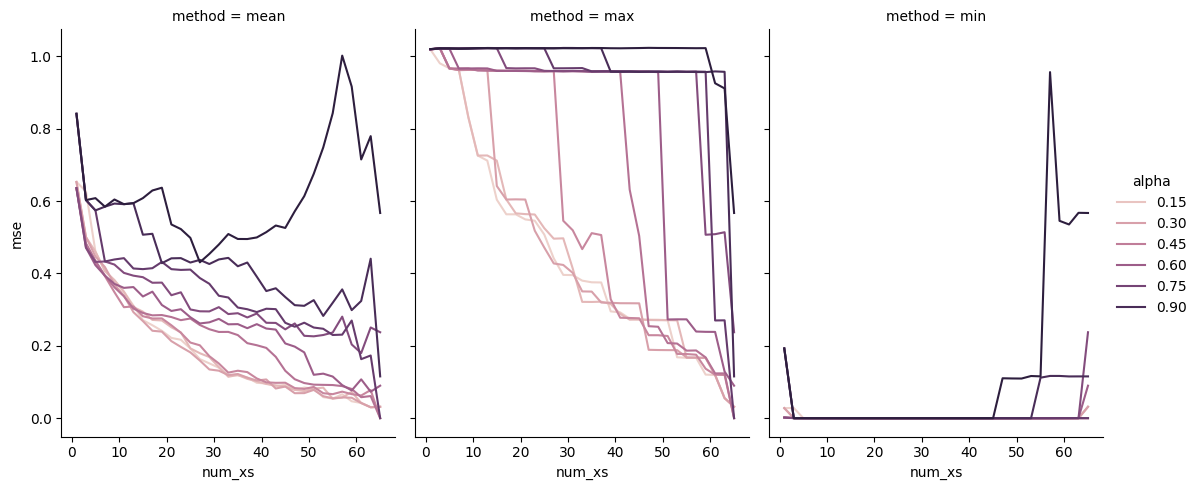

In [8]:
# Plot the lines on two facets
sns.relplot(
    data=mes_total,
    x="num_xs", y="mse",
    hue="alpha", col="method",
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)